Mengambilfitur dan target

- Fitur x = usia dan estimasi gaji

- Target y = churn (Exited)



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#import dataset
dataset = pd.read_csv('Customer-Churn-Records.csv')

In [ ]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [ ]:
# Ambil fitur numerik: Age dan EstimatedSalary (bukan kolom yang bertipe string seperti Geography)
x = dataset[['Age', 'EstimatedSalary']].values
y = dataset['Exited'].values  # Target churn

In [ ]:
print(x)

[[4.2000000e+01 1.0134888e+05]
 [4.1000000e+01 1.1254258e+05]
 [4.2000000e+01 1.1393157e+05]
 ...
 [3.6000000e+01 4.2085580e+04]
 [4.2000000e+01 9.2888520e+04]
 [2.8000000e+01 3.8190780e+04]]


In [ ]:
print(y)

[1 0 1 ... 1 1 0]


In [ ]:
# Melihat jumlah baris
print(len(x))

10000


In [ ]:
print(len(y))

10000


In [ ]:
# Split dataset menjadi data latih dan data uji
from sklearn.model_selection import train_test_split
x_latih, x_test, y_latih, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
print(x_latih)

[[3.9000000e+01 5.8310000e+03]
 [3.2000000e+01 9.5611470e+04]
 [3.4000000e+01 4.2855970e+04]
 ...
 [3.5000000e+01 1.8142987e+05]
 [3.8000000e+01 1.4875016e+05]
 [4.8000000e+01 1.1885526e+05]]


In [ ]:
# Ukuran data latih dan data test
print(len(x_latih))

7500


In [ ]:
print(len(x_test))

2500


In [ ]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_latih = sc.fit_transform(x_latih)
x_test = sc.transform(x_test)

In [ ]:
print(x_latih)

[[ 0.01526571 -1.64080994]
 [-0.65260917 -0.07927152]
 [-0.46178778 -0.99684012]
 ...
 [-0.36637708  1.4133552 ]
 [-0.08014499  0.84496184]
 [ 0.87396199  0.32500428]]


In [ ]:
print(x_test)

[[-0.36637708  1.61203027]
 [ 0.11067641  0.49626891]
 [ 0.3014978  -0.42502785]
 ...
 [ 0.01526571 -0.272747  ]
 [-0.08014499 -0.93306558]
 [-0.74801987 -0.47380732]]


In [ ]:
# Training dengan K-NN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(x_latih, y_latih)

KNeighborsClassifier()

In [ ]:
# Prediksi
y_predisi = classifier.predict(x_test)

In [ ]:
# Evaluasi
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_predisi)
print("Confusion Matrix:\n", cm)
print("Akurasi:", accuracy_score(y_test, y_predisi))

Confusion Matrix:
 [[1827  163]
 [ 370  140]]
Akurasi: 0.7868


<ipython-input-35-1d615aca7aa2>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_data[y_data == h, 0], x_data[y_data == h, 1],


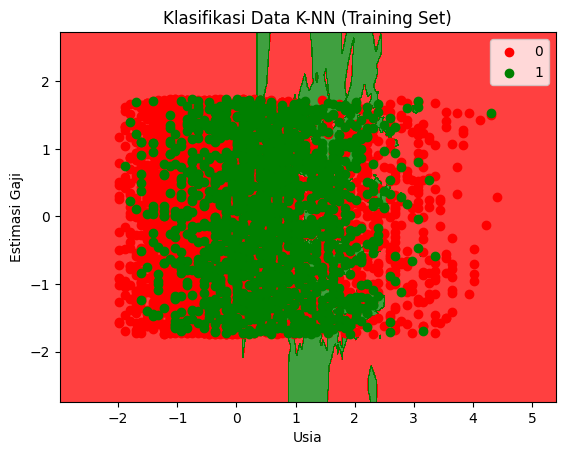

In [ ]:
# Visualisasi - Training
from matplotlib.colors import ListedColormap
x_data, y_data = x_latih, y_latih
x_one, x_two = np.meshgrid(np.arange(start=x_data[:, 0].min() - 1, stop=x_data[:, 0].max() + 1, step=0.01),
                           np.arange(start=x_data[:, 1].min() - 1, stop=x_data[:, 1].max() + 1, step=0.01))
plt.contourf(x_one, x_two, classifier.predict(np.array([x_one.ravel(), x_two.ravel()]).T).reshape(x_one.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(x_one.min(), x_one.max())
plt.ylim(x_two.min(), x_two.max())
for g, h in enumerate(np.unique(y_data)):
    plt.scatter(x_data[y_data == h, 0], x_data[y_data == h, 1],
                c=ListedColormap(('red', 'green'))(g), label=h)
plt.title('Klasifikasi Data K-NN (Training Set)')
plt.xlabel('Usia')
plt.ylabel('Estimasi Gaji')
plt.legend()
plt.show()


<ipython-input-36-ffc1509dfadd>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_data[y_data == h, 0], x_data[y_data == h, 1],


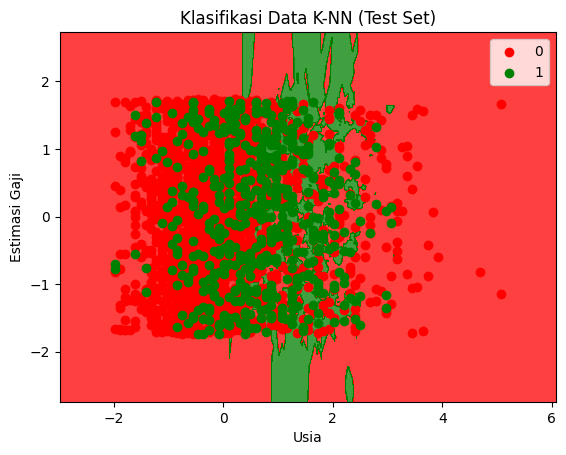

In [ ]:
# Visualisasi - Test
x_data, y_data = x_test, y_test
x_one, x_two = np.meshgrid(np.arange(start=x_data[:, 0].min() - 1, stop=x_data[:, 0].max() + 1, step=0.01),
                           np.arange(start=x_data[:, 1].min() - 1, stop=x_data[:, 1].max() + 1, step=0.01))
plt.contourf(x_one, x_two, classifier.predict(np.array([x_one.ravel(), x_two.ravel()]).T).reshape(x_one.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(x_one.min(), x_one.max())
plt.ylim(x_two.min(), x_two.max())
for g, h in enumerate(np.unique(y_data)):
    plt.scatter(x_data[y_data == h, 0], x_data[y_data == h, 1],
                c=ListedColormap(('red', 'green'))(g), label=h)
plt.title('Klasifikasi Data K-NN (Test Set)')
plt.xlabel('Usia')
plt.ylabel('Estimasi Gaji')
plt.legend()
plt.show()